In [3]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('./img.jpg')
image_gray = cv2.imread('./img.jpg', cv2.IMREAD_GRAYSCALE)
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])

# cv2.imshow('image', image2)

blur = cv2.GaussianBlur(image_gray, ksize = (3,3), sigmaX = 0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
edge = cv2.Canny(blur, 10, 250)
# cv2.imshow('edge', edge)

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernal)
# cv2.imshow('closed', closed)
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0
Contours_image = cv2.drawContours(image, contours, -1, (235, 206, 135), 10)
cv2.imshow('Contours_image', Contours_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


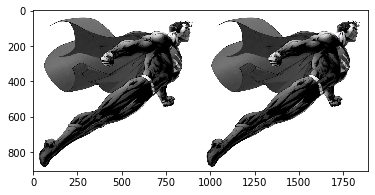

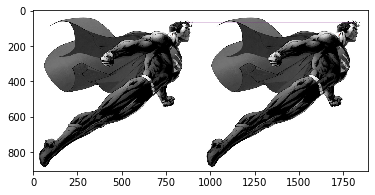

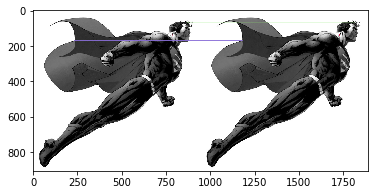

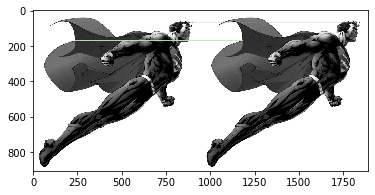

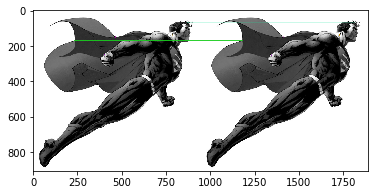

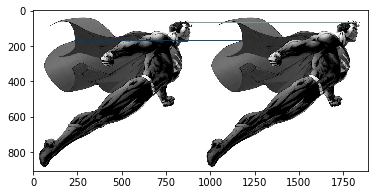

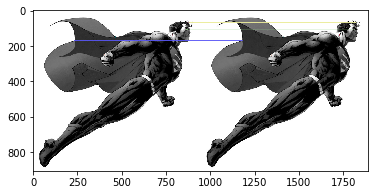

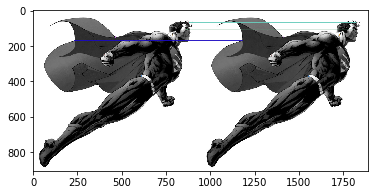

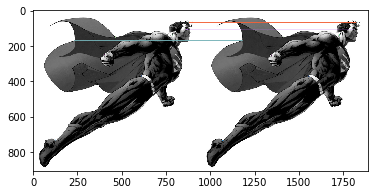

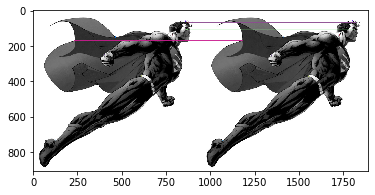

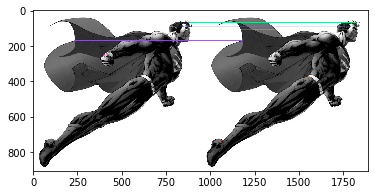

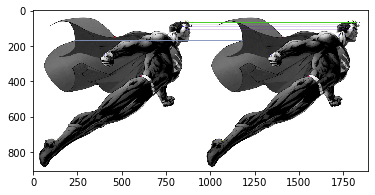

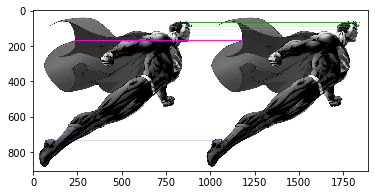

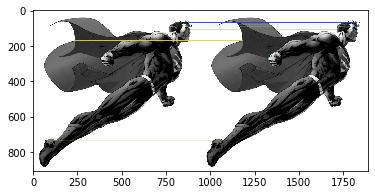

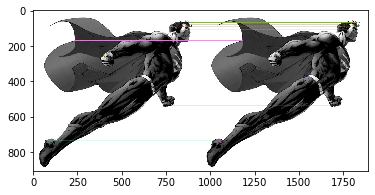

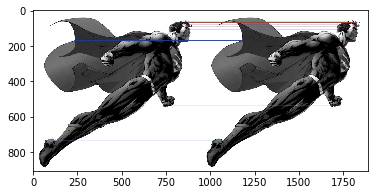

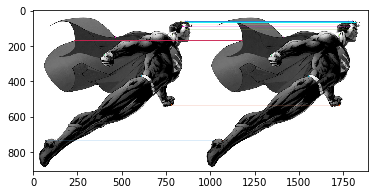

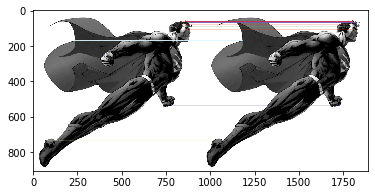

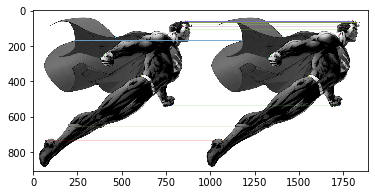

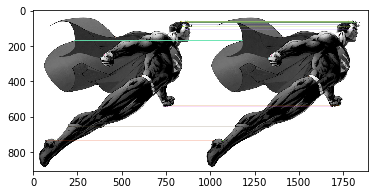

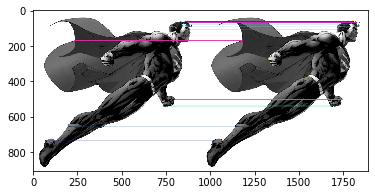

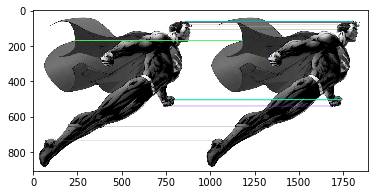

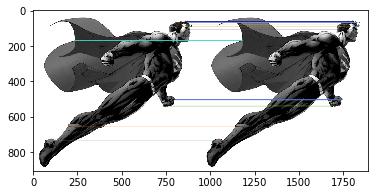

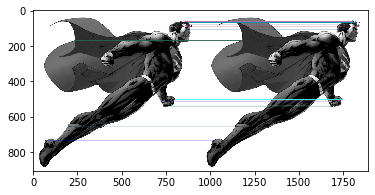

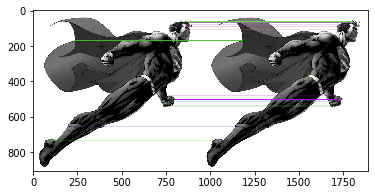

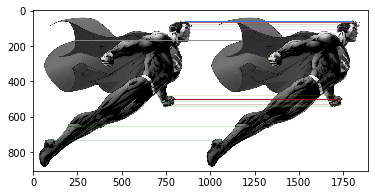

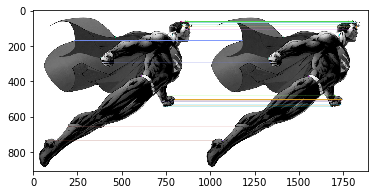

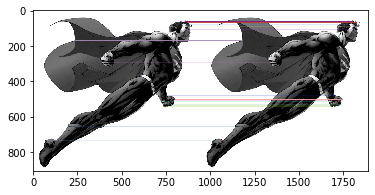

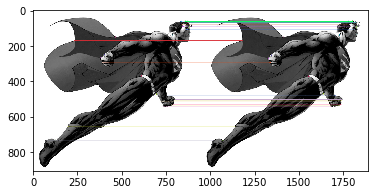

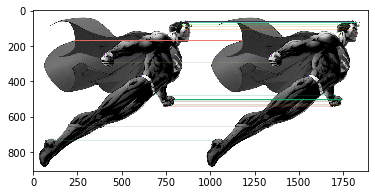

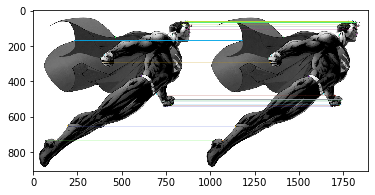

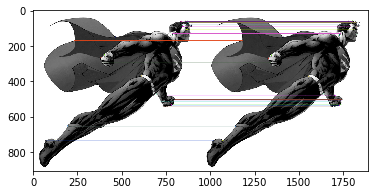

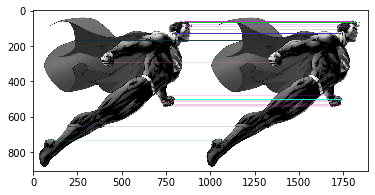

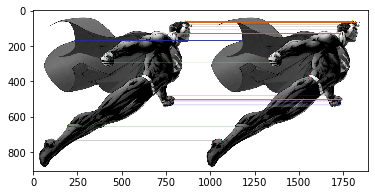

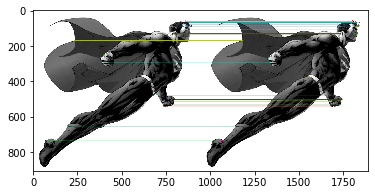

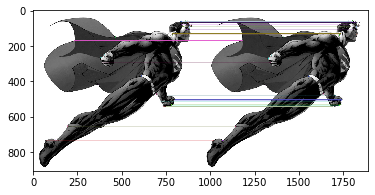

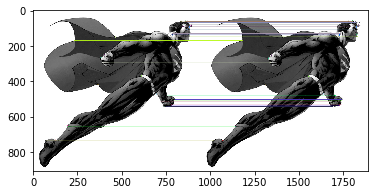

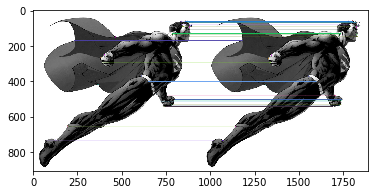

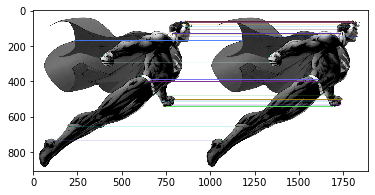

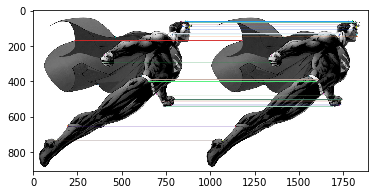

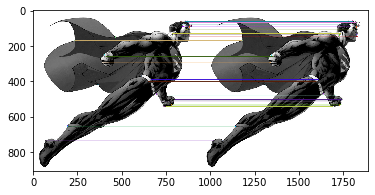

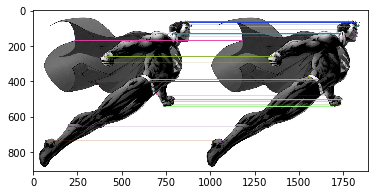

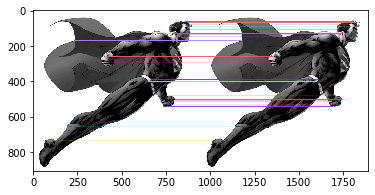

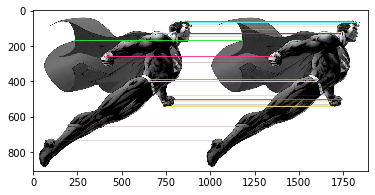

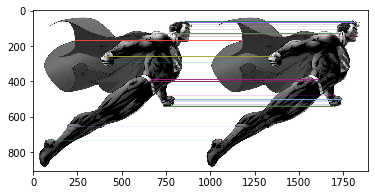

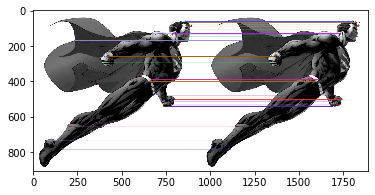

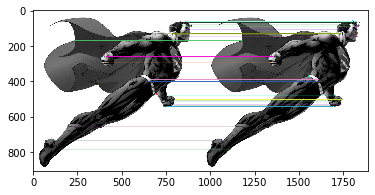

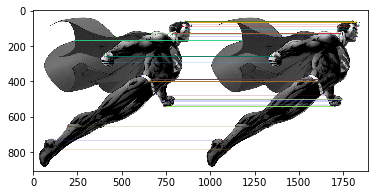

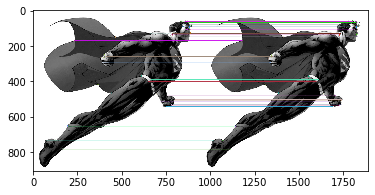

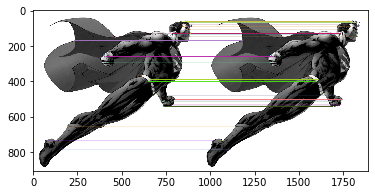

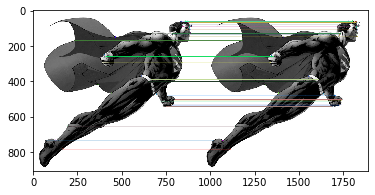

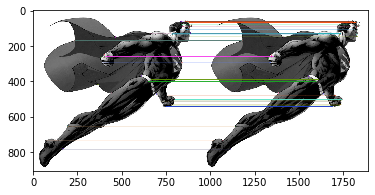

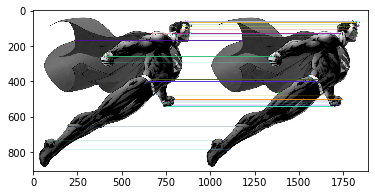

KeyboardInterrupt: 

In [4]:
class CompareImage:
    def __init__(self):
        pass
    
    def readimage(self, filepath):
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        cv2.namedWindow('Compareimage', cv2.WINDOW_NORMAL)
        cv2.imshow('base', img)
        cv2.waitKey(3000)
        cv2.destroyAllWindows()
        return img
    
    def Differentimage(self, img1, img2):
        orb = cv2.ORB_create()
        
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)
        
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        
        matches = bf.match(des1, des2)
        
        matches = sorted(matches, key = lambda x:x.distance)
        
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)
        
        fit = []
        for m, n in matches:
            if m.distance < .8 * n.distance:
                fit.append([m])
            knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, fit, None, flags = 2)
            plt.imshow(knn_image)
            plt.show()
            
    def start(self):
        filepath1 = './img.jpg'
        filepath2 = './img.jpg'
            
        img1 = self.readimage(filepath1)
        img2 = self.readimage(filepath2)
        
        self.Differentimage(img1, img2)
        
if __name__ == "__main__":
    cimg = CompareImage()
    cimg.start()